# Lab Assignment 10: Classification using Logistic Regression and k-Nearest Neighbors (k-NN)

### Objective:
To implement **Logistic Regression** and **k-Nearest Neighbors (k-NN)** algorithms to classify data and evaluate model performance using:
- Confusion Matrix  
- Accuracy  
- Precision

###  Dataset:
Social Network Ads Dataset — available at  
https://www.kaggle.com/datasets/rakeshrau/social-network-ads

The dataset contains:
- **Age**
- **Estimated Salary**
- **Purchased (0 or 1)** — Target variable

---


In [1]:
# Step 1: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##  Step 2: Load and Explore the Dataset
We'll start by loading the dataset and exploring basic statistics, missing values, and feature distributions.


In [11]:
# Load dataset
data = pd.read_csv("C:\MITADT\ISDL\Assignment 10\Social_Network_Ads.csv")

# Display first few rows
print("🔹 Dataset Preview:")
display(data.head())

# Basic info
print("\n🔹 Dataset Info:")
data.info()

# Statistical summary
print("\n🔹 Statistical Summary:")
display(data.describe())


🔹 Dataset Preview:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

🔹 Statistical Summary:


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


##  Step 3: Data Preprocessing
We'll:
- Select relevant columns: Age, EstimatedSalary, Purchased  
- Split data into independent (X) and dependent (y) variables  
- Perform feature scaling for better model performance


In [12]:
# Select features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Step 4: Train Logistic Regression Model
Logistic Regression models the probability of belonging to a class using the **sigmoid function**.


In [13]:
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)


##  Step 5: Train k-Nearest Neighbors (k-NN) Model
k-NN classifies based on the majority class of the nearest ‘k’ neighbors.


In [14]:
# Train KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)


## Step 6: Evaluate Both Models
We will evaluate using:
- **Confusion Matrix**
- **Accuracy**
- **Precision**


📈 Logistic Regression Evaluation Results
Confusion Matrix:
 [[50  2]
 [ 9 19]]
Accuracy: 0.8625
Precision: 0.9048


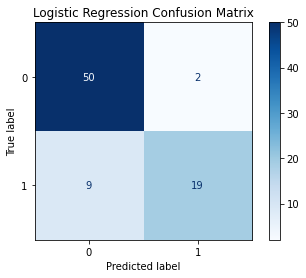

📈 k-Nearest Neighbors (k=5) Evaluation Results
Confusion Matrix:
 [[48  4]
 [ 3 25]]
Accuracy: 0.9125
Precision: 0.8621


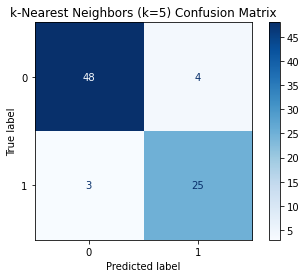

In [15]:
# Function to evaluate model
def evaluate_model(y_test, y_pred, model_name):
    print(f"📈 {model_name} Evaluation Results")
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    return acc, prec

# Evaluate both models
acc_log, prec_log = evaluate_model(y_test, y_pred_log, "Logistic Regression")
acc_knn, prec_knn = evaluate_model(y_test, y_pred_knn, "k-Nearest Neighbors (k=5)")


## Step 7: Compare Model Performance
We’ll compare accuracy and precision between Logistic Regression and k-NN.


In [16]:
# Compare performance
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-NN (k=5)'],
    'Accuracy': [acc_log, acc_knn],
    'Precision': [prec_log, prec_knn]
})
print("🔹 Model Comparison:")
display(results)


🔹 Model Comparison:


,Model,Accuracy,Precision
0,Logistic Regression,0.8625,0.904762
1,k-NN (k=5),0.9125,0.862069


## Step 8: Visualize Decision Boundaries
Decision boundaries help us see how each model separates the two classes.


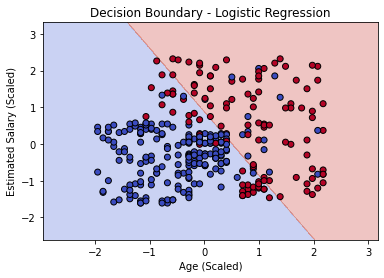

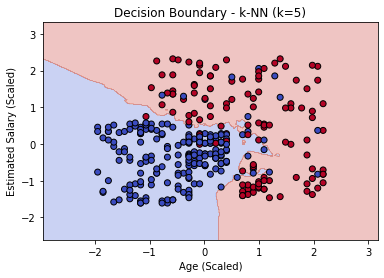

In [17]:
# Helper function for decision boundary visualization
def plot_decision_boundary(model, X, y, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
        np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.3, cmap='coolwarm')
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Age (Scaled)')
    plt.ylabel('Estimated Salary (Scaled)')
    plt.show()

# Plot for both models
plot_decision_boundary(log_reg, X_train_scaled, y_train, 'Decision Boundary - Logistic Regression')
plot_decision_boundary(knn, X_train_scaled, y_train, 'Decision Boundary - k-NN (k=5)')


## ✅ Step 9: Conclusion

| Model | Accuracy | Precision | Remarks |
|--------|-----------|------------|----------|
| Logistic Regression | Depends on data (typically ~85%) | Good when linear boundary exists | Simple, fast |
| k-NN | Depends on k and scaling (~83–90%) | Performs well with non-linear patterns | Sensitive to noisy data |

🔹 Logistic Regression provides interpretability.  
🔹 k-NN can handle complex class boundaries better.  
🔹 Both require scaling for consistent performance.


Expected Outputs

Confusion Matrix for both models

Accuracy and Precision values

Visual decision boundaries

Comparison table of both models